In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Modules for base world map
%load_ext signature
%matplotlib inline

import matplotlib as mpl
import io
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

# Set header variables
shapefile = 'Resources/ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes'
num_colors = 9
year = 2017
title = 'Total Meat Livestock Production by percentage in {}'.format(year)
imgfile = 'img/{}.png'.format(title)

# Description for Map
description = '''
Total meat production includes meat from animals slaughtered in countries, irrespective of
their origin and comprises horse meat, poultry meat and meat from all other domestic or wild
animals such as camels, rabbits, reindeer and game animals.'''.strip()

In [2]:
# Production: Livestock Primary
import requests
import io

# Set url parametrs
# Set FAO stardand url parametrs
fao_area_cs = '&area_cs=FAO'
fao_item_cs = '&item_cs=FAO'
fao_tail = '&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/QL?'
area_str = '2%2C3%2C4%2C5%2C6%2C7%2C258%2C8%2C9%2C1%2C22%2C10%2C11%2C52%2C12%2C13%2C16%2C14%2C57%2C255%2C15%2C23%2C53%2C17%2C18%2C19%2C80%2C20%2C21%2C239%2C26%2C27%2C233%2C29%2C35%2C115%2C32%2C33%2C36%2C37%2C39%2C259%2C40%2C351%2C96%2C128%2C214%2C41%2C44%2C45%2C46%2C47%2C48%2C98%2C49%2C50%2C167%2C51%2C107%2C116%2C250%2C54%2C72%2C55%2C56%2C58%2C59%2C60%2C61%2C178%2C63%2C209%2C238%2C62%2C65%2C64%2C66%2C67%2C68%2C69%2C70%2C74%2C75%2C73%2C79%2C81%2C82%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C175%2C91%2C93%2C94%2C95%2C97%2C99%2C100%2C101%2C102%2C103%2C104%2C264%2C105%2C106%2C109%2C110%2C112%2C108%2C114%2C83%2C118%2C113%2C120%2C119%2C121%2C122%2C123%2C124%2C125%2C126%2C256%2C129%2C130%2C131%2C132%2C133%2C134%2C127%2C135%2C136%2C137%2C270%2C138%2C145%2C140%2C141%2C273%2C142%2C143%2C144%2C28%2C147%2C148%2C149%2C150%2C151%2C153%2C156%2C157%2C158%2C159%2C160%2C161%2C163%2C162%2C299%2C221%2C164%2C165%2C180%2C166%2C168%2C169%2C170%2C171%2C172%2C173%2C174%2C177%2C179%2C117%2C146%2C183%2C185%2C184%2C182%2C187%2C188%2C189%2C190%2C191%2C244%2C192%2C193%2C194%2C195%2C272%2C186%2C196%2C197%2C200%2C199%2C198%2C25%2C201%2C202%2C277%2C203%2C38%2C276%2C206%2C207%2C260%2C210%2C211%2C212%2C208%2C216%2C154%2C176%2C217%2C218%2C219%2C220%2C222%2C223%2C213%2C224%2C227%2C228%2C226%2C230%2C225%2C229%2C215%2C240%2C231%2C234%2C235%2C155%2C236%2C237%2C243%2C205%2C249%2C248%2C251%2C181'
fao_area = 'area=' + area_str
fao_year = '&year=' + '%2C'.join(np.arange(1961,2019).astype(str))
element_str = '2510'
fao_element = '&element=' + element_str
item_str = '1765'
fao_item = '&item=' + item_str
# finalize fao url
pr_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item  + fao_item_cs + fao_year + fao_tail

# Request Get Production: Livestock Primary Data from FOA
response = requests.get(pr_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
fao_pr_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
fao_pr_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1961,1961,tonnes,129420.0,A,"Aggregate, may include official, semi-official..."
1,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1962,1962,tonnes,132206.0,A,"Aggregate, may include official, semi-official..."
2,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1963,1963,tonnes,138971.0,A,"Aggregate, may include official, semi-official..."
3,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1964,1964,tonnes,143830.0,A,"Aggregate, may include official, semi-official..."
4,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1965,1965,tonnes,150195.0,A,"Aggregate, may include official, semi-official..."


In [3]:
# Load GFN country code
gfn_csv_path = "Resources/Country/GFN Country code concordance table.csv"
gfn_df = pd.read_csv(gfn_csv_path)
# Merge GFN ISO Alpha-3 Code to fao_gl_df
map_df = pd.merge(fao_pr_df, gfn_df, how='left', left_on='Area Code', right_on='GFN Country Code')
map_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Country Name,GFN Country Code,ISO Alpha-2 Code,ISO Alpha-3 Code
0,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1961,1961,tonnes,129420.0,A,"Aggregate, may include official, semi-official...",Afghanistan,2.0,AF,AFG
1,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1962,1962,tonnes,132206.0,A,"Aggregate, may include official, semi-official...",Afghanistan,2.0,AF,AFG
2,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1963,1963,tonnes,138971.0,A,"Aggregate, may include official, semi-official...",Afghanistan,2.0,AF,AFG
3,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1964,1964,tonnes,143830.0,A,"Aggregate, may include official, semi-official...",Afghanistan,2.0,AF,AFG
4,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",1965,1965,tonnes,150195.0,A,"Aggregate, may include official, semi-official...",Afghanistan,2.0,AF,AFG


In [4]:
map2_df = map_df

In [5]:
year = 2017
title = 'Total Meat Livestock Production by 1M Tonnes in {}'.format(year)
imgfile = 'img/{}.png'.format(title)

map_df = map2_df[map2_df['Year Code'] == year]

In [6]:
# make sure the Countries are within the GeonamesCache
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [7]:
# Set Index to Country code ISO-3
map_df.set_index('ISO Alpha-3 Code', inplace=True)
map_df = map_df.ix[iso3_codes].dropna() # Filter out non-countries and missing values.

In [8]:
# Calculate the production %
production_qty = map_df['Value'] / 1000000
# Set value to grazing land percentage
values = production_qty
# Set bin based off value
cm = plt.get_cmap('Greens')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
map_df['bin'] = np.digitize(values, bins) - 1 
map_df.sort_values('bin', ascending=False).head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Country Name,GFN Country Code,ISO Alpha-2 Code,bin
ISO Alpha-3 Code,,,,,,,,,,,,,,,,,,
CHN,QL,Livestock Primary,351.0,China,5510.0,Production,1765.0,"Meat, Total",2017.0,2017.0,tonnes,88163527.0,A,"Aggregate, may include official, semi-official...",China,351.0,CN,8
USA,QL,Livestock Primary,231.0,United States of America,5510.0,Production,1765.0,"Meat, Total",2017.0,2017.0,tonnes,45790127.0,A,"Aggregate, may include official, semi-official...",United States of America,231.0,US,4
BRA,QL,Livestock Primary,21.0,Brazil,5510.0,Production,1765.0,"Meat, Total",2017.0,2017.0,tonnes,27717036.0,A,"Aggregate, may include official, semi-official...",Brazil,21.0,BR,2
ARE,QL,Livestock Primary,225.0,United Arab Emirates,5510.0,Production,1765.0,"Meat, Total",2017.0,2017.0,tonnes,159284.0,A,"Aggregate, may include official, semi-official...",United Arab Emirates,225.0,AE,0
MOZ,QL,Livestock Primary,144.0,Mozambique,5510.0,Production,1765.0,"Meat, Total",2017.0,2017.0,tonnes,259413.0,A,"Aggregate, may include official, semi-official...",Mozambique,144.0,MZ,0


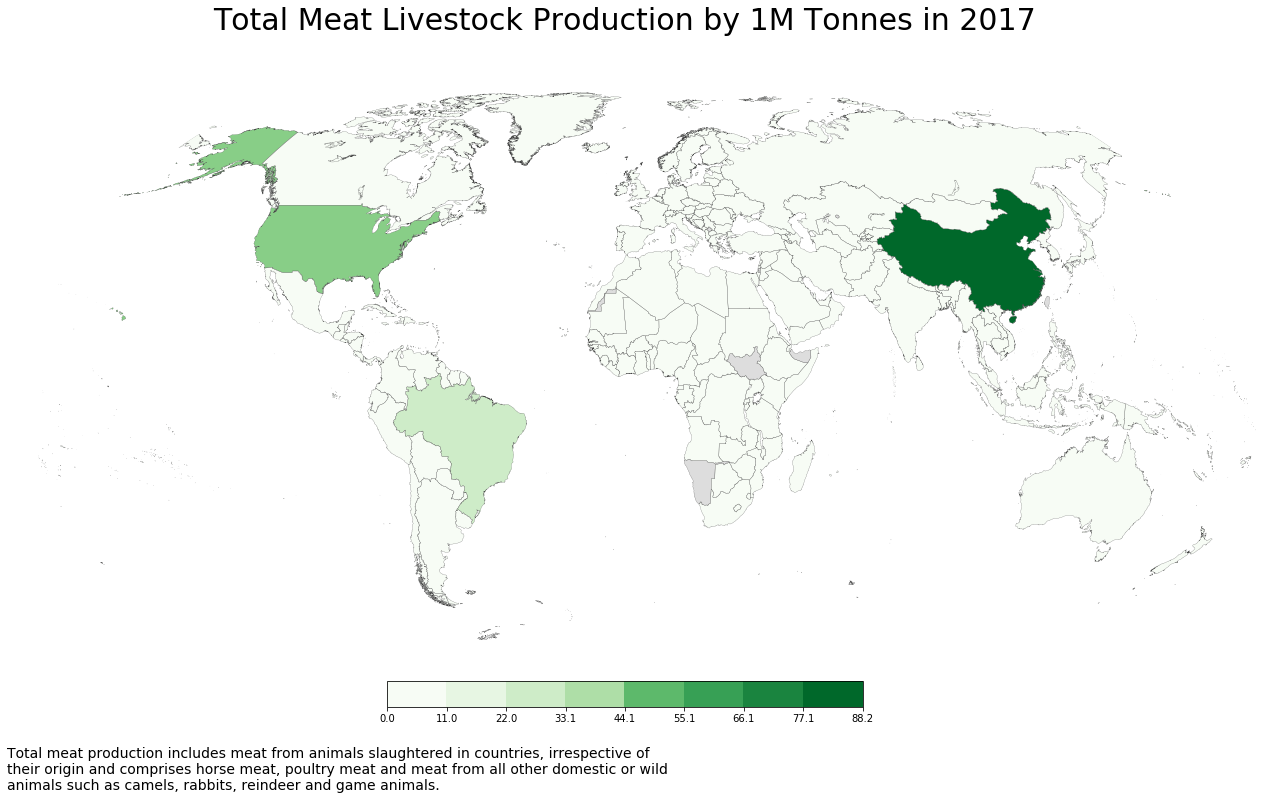

In [9]:
# Plot base world map
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Total Meat Livestock Production by 1M Tonnes in {}'.format(year), fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in map_df.index:
        color = '#dddddd'
    else:
        color = scheme[map_df.ix[iso3]['bin']]
    
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
    
# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')

plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)